# Analysis of 'No Show Data in Brazil' 

## Step 1: Importing Libraries and loading data 

In [187]:
#Importing all needed libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [188]:
#Loading data set and investigation of general structure
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#Displaying first 10 rows 
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


## Step 2: Data Wrangling 

### General properties

In [189]:
#How many rows and columns does the data set have?
'This data set has {} rows and {} columns'.format(df.shape[0],df.shape[1])

'This data set has 110527 rows and 14 columns'

In [190]:
#Checking for empty cells and data types in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [191]:
#How many unique values of each attribute exist?
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [192]:
# General information about the data set 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Duplicated Values Validation

In [193]:
#Are they duplicates in the data set?
'There are {} dupliactes in the data set'.format(sum(df.duplicated()))

'There are 0 dupliactes in the data set'

In [194]:
# Check for duplicate appointmentID

sum(df.AppointmentID.duplicated())

0

In [195]:
sum(df.PatientId.duplicated())

48228

In [196]:
df.PatientId.value_counts().head(5)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
Name: PatientId, dtype: int64

Looking at the cells above, we note that the PatientId column contains repeated values which means same patients booked more than an appointment; looking at the output of the value_counts() function, we note the top 5 patients that booked the biggest number of appointments.
With that, our analysis will mainly rely on the appointment count,rather than patients count; however, we will reference the number of patients, where applicable, to help identify any corrolation between specific patterns and the diversity of the studied group(s).

### Incorrect Data Validation

In [197]:
# Check for zero/negative AppointmentID

df[df.AppointmentID < 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [198]:
# Check for zero/negative PatientsId values

df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [199]:
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

Looking at the AppointmentDay column values above, the time portion is set to zero, therefore, the time aspect of the appointment is not going to be included in this analysis.

In [200]:
# Check if the Age column has negative values; 
# we will accept patients with 0 age assuming they represent newborns less than one year old

df[df.Age < 0]['Age']

99832   -1
Name: Age, dtype: int64

### Data Cleaning/Preparation

In [201]:
# Rename Columns

df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Status']

In [202]:
df['PatientID'] = df['PatientID'].astype('int64')

In [206]:
# Converts the two variables to datetime variables
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Create a variable called "AwaitingTime" by subtracting the date the patient made the appointment and the date of the appointment.
df['WaitingTime'] = df["AppointmentDay"].sub(df["ScheduledDay"], axis=0)

# Convert the result "AwaitingTime" to number of days between appointment day and scheduled day. 
df["WaitingTime"] = (df["WaitingTime"] / np.timedelta64(1, 'D')).abs()

In [207]:
# Check for success
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,AwaitingTime,WaitingTime
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.776481,0.776481
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.672535,0.672535
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.679907,0.679907
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.728831,0.728831
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.671794,0.671794


In [208]:
# Check for success
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,AwaitingTime,WaitingTime
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.776481,0.776481
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.672535,0.672535
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.679907,0.679907
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.728831,0.728831
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.671794,0.671794


In [216]:
# Exclude rows with negative date differences
df = df[df['AppointmentDay'] >= df['ScheduledDay']]

In [217]:
# Exclude the record with the negative Age value
df = df[df.Age != -1]

In [218]:
# Define age categories using quartiles 
boundries = [0, 18, 37, 55, 115]
label_names = ['youngest', 'mid', 'old', 'oldest']

df['age_group'] = pd.cut(df['Age'], boundries, labels=label_names)

In [219]:
df.groupby('age_group').mean()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,AwaitingTime,WaitingTime
age_group,,,,,,,,,,,
youngest,1.468109e+14,5.652955e+06,9.274087,0.123524,0.001879,0.002281,0.000872,0.009528,0.506710,15.446386,15.446386
mid,1.456058e+14,5.655304e+06,28.167512,0.132837,0.041836,0.011953,0.018324,0.014659,0.525372,14.927558,14.927558
old,1.459366e+14,5.656764e+06,46.818764,0.103731,0.242094,0.075557,0.046938,0.019599,0.501002,14.808115,14.808115
oldest,1.428586e+14,5.655955e+06,67.190607,0.030372,0.515602,0.196276,0.033337,0.035729,0.453349,15.247183,15.247183


In [220]:
# Limit our dataset to appointments with NoShowUp status and use this 

NoShow_df = df[df['Status'] == 'NoShow']

## Step 2: EDA 

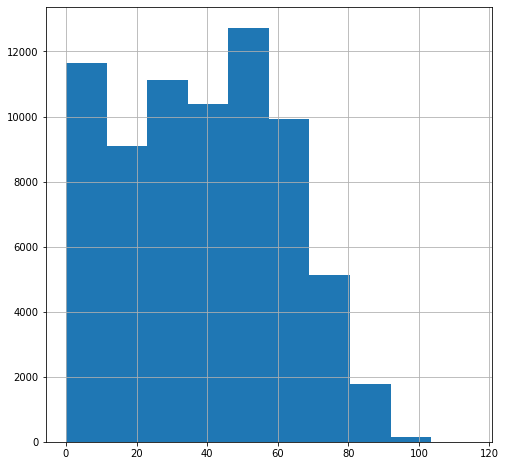

In [221]:
#Looking at age distribution
df['Age'].hist(figsize = [8,8])

### Looking at no show rates

In [222]:
no_show = df['Status'].value_counts()
no_show

'{} percent of patients in total did not show up.'.format(no_show['Yes']/no_show.sum()*100)

'28.5190177740102 percent of patients in total did not show up.'

In [223]:
# Recoding no show status 

df['Status'].replace('Yes', 1, inplace=True) #No Shows
df['Status'].replace('No', 0, inplace=True) #Shows

In [224]:
# Looking at different traits and their no show rates

traits = ['Gender', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

for trait in traits:
    print(df.groupby(trait)['Status'].mean())

Gender
F    0.284460
M    0.286659
Name: Status, dtype: float64
Hypertension
0    0.298382
1    0.235232
Name: Status, dtype: float64
Diabetes
0    0.288066
1    0.249582
Name: Status, dtype: float64
Alcoholism
0    0.283745
1    0.340834
Name: Status, dtype: float64
Handicap
0    0.285739
1    0.250633
2    0.303571
3    0.250000
4    0.500000
Name: Status, dtype: float64
SMS_received
0    0.294377
1    0.275745
Name: Status, dtype: float64


In [225]:
# Looking at different ages and their no show rates

ages = [0, 20, 40, 60, 100]
age_groups = df.groupby(pd.cut(df.Age, ages))

age_means = age_groups['Status'].mean()
age_means

Age
(0, 20]      0.334803
(20, 40]     0.332285
(40, 60]     0.256753
(60, 100]    0.204480
Name: Status, dtype: float64

In [241]:
# Looking at different time differences and their no show rates

times = [0, 1, 7, 14]
wait_times = df.groupby(pd.cut(df.WaitingTime, times))

time_means = wait_times['Status'].mean()
time_means

WaitingTime
(0, 1]     0.213505
(1, 7]     0.246886
(7, 14]    0.304699
Name: Status, dtype: float64

### Research Question 1: Do younger people tend to show up less for appointments?

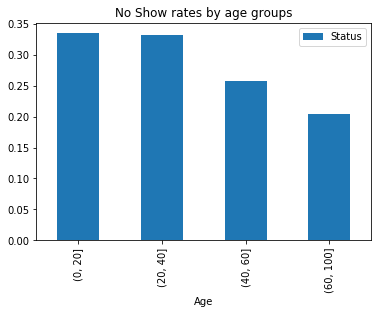

In [240]:
age_means.plot(kind='bar', title='No Show rates by age groups', legend=True)

We can see from the plot (above) that the people who did not show up for their appointments were younger. This doesn't account for the fact that the number of people in "Yes" is about four times smaller than "No". I imagine that if each group had closer or same numbers that the "Yes" and "No" visuals would be more similar. Further analysis could be done to equalize the "Yes" and "No" group numbers and then re-make the plot. 

### Research Question 2: Do longer wait times lead to lower show rates?

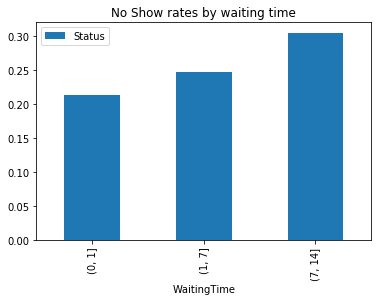

In [243]:
time_means.plot(kind='bar', title='No Show rates by waiting time', legend=True)

We can see from the plot (above) that longer waiting times in general lead to lower show rates. 
Further research could be done on other atributes and their effect on this (eg. SMS received prior to appointment, etc)

### Research Question 3: Does the SMS has an effect on the show rate?

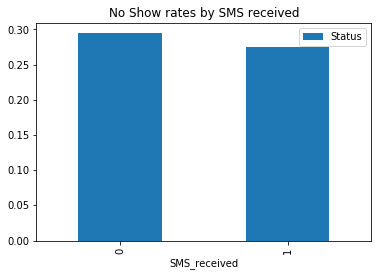

In [245]:
sms_means = df.groupby('SMS_received')['Status'].mean()
sms_means.plot(kind='bar', title='No Show rates by SMS received', legend=True)

We can see from the plot (above) that receiving an SMS prior to an appointment tends to have a positive effect, although this effect seems to be very limited.

## Conclusions

1) In general, there wasn't a huge difference in age for those who did or didn't show up to appointments. I believe the difference would have been bigger had the group who did show up for appointments not been nearly 4 times larger than the group of people who didn't show up for appointments.

2) Though the age differences aren't very wide, the people who didn't show up to appointments tended to be younger. Again, this is also possibly caused by the fact that the No-show=Yes group is about 4 times smaller than the other group.

3) Recveiving an SMS prior to an appointment reduces the no show rate, but not significantly. 

## Limitations

1) Lots of the columns used categorical data which makes it more difficult to analyze and visualize. This in turn somewhat hinders the ability to find any strong correlations between columns.

2) Again, the unbalance split between the No-show Yes and No-show No groups did't allow for a truly balanced or > equal analysis to be done but at the same time this uneven split showed some potentially interesting areas that > could be further explored.